<a href="https://colab.research.google.com/github/Abhi5241/Hate-Speech-Classification-using-LSTM/blob/main/HateSpeechClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk

In [1]:
!nvidia-smi

Mon Feb 17 08:22:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!unzip /content/dataset.csv.zip


Archive:  /content/dataset.csv.zip
  inflating: hate speech 1.csv       


In [5]:
imbalance_data = pd.read_csv('/content/hate speech 1.csv')
imbalance_data.head()

,tweet,hate_speech
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,3
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,3
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,2
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,6


In [6]:
imbalance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        24783 non-null  object
 1   hate_speech  24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [11]:
imbalance_data["hate_speech"].unique()

array([0, 3, 2, 6, 1, 7, 4, 5, 9, 8])

# **Exploratory Data Analysis**

<Axes: xlabel='hate_speech', ylabel='count'>

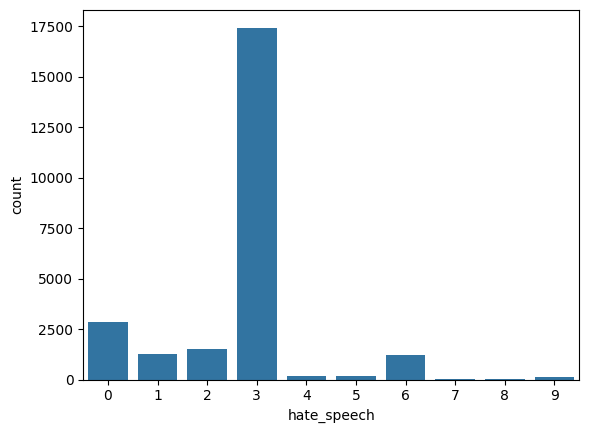

In [12]:
sns.countplot(x="hate_speech", data=imbalance_data)

In [13]:
imbalance_data.shape

(24783, 2)

In [14]:
imbalance_data.isnull().sum()

,0
tweet,0
hate_speech,0


In [24]:
imbalance_data.iloc[0,0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."